In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [229]:
import io
%cd "C:\Users\chkee\Downloads\HOME LLC"

C:\Users\chkee\Downloads\HOME LLC


In [230]:
final_data=pd.read_excel("Dataset.xlsx")

In [231]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  442 non-null    datetime64[ns]
 1   Price             441 non-null    float64       
 2   Employement_rate  442 non-null    float64       
 3   Inflation_rate    441 non-null    float64       
 4   Population        442 non-null    float64       
 5   Male_rate         442 non-null    float64       
 6   Female_rate       442 non-null    float64       
 7   GDP               442 non-null    float64       
 8   emp_popl_ratio    442 non-null    float64       
 9   Buildings(K)      442 non-null    int64         
 10  emp_const_k       440 non-null    float64       
 11  Income_b          442 non-null    float64       
 12  House_Ownership%  441 non-null    float64       
 13  savings           442 non-null    float64       
 14  Mortgage          442 non-

In [232]:
final_data.isnull().sum().sort_values(ascending=False)

emp_const_k         2
Price               1
Inflation_rate      1
House_Ownership%    1
observation_date    0
Employement_rate    0
Population          0
Male_rate           0
Female_rate         0
GDP                 0
emp_popl_ratio      0
Buildings(K)        0
Income_b            0
savings             0
Mortgage            0
dtype: int64

In [233]:
# filling null values with mean
for col in final_data.columns:
    final_data[col]=final_data[col].fillna(final_data[col].value_counts().mean())

In [234]:
# EDA
import seaborn as sns

In [235]:
final_data.describe()

,Price,Employement_rate,Inflation_rate,Population,Male_rate,Female_rate,GDP,emp_popl_ratio,Buildings(K),emp_const_k,Income_b,House_Ownership%,savings,Mortgage
count,442.000000,442.000000,442.000000,4.420000e+02,442.000000,442.000000,4.420000e+02,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,141.591693,70.799278,83.283937,1.861984e+08,90.573982,75.140724,3.935658e+05,61.346606,1302.266968,740.635759,11253.276244,65.647552,6.314932,9.244706
std,61.488345,2.205414,20.235405,1.796187e+07,1.825152,1.201234,3.302429e+05,2.062251,352.398759,134.242883,5272.898299,3.251069,2.885290,1.161002
min,1.002273,60.193856,1.009153,1.539042e+08,86.400000,71.000000,7.998630e+04,51.300000,520.000000,1.052632,3820.200000,8.018182,1.400000,6.740000
25%,82.013250,69.559883,67.740917,1.683357e+08,88.725000,74.400000,1.350493e+05,59.800000,1090.000000,632.575000,6569.625000,64.100000,4.900000,8.380000
50%,140.689500,71.269466,82.705013,1.908362e+08,90.600000,75.300000,2.522550e+05,61.850000,1334.000000,739.300000,10509.400000,65.500000,6.000000,9.435000
75%,178.616250,72.169123,98.290584,2.031864e+08,91.800000,75.900000,5.947996e+05,62.900000,1544.500000,827.725000,14875.925000,67.400000,7.400000,10.240000
max,311.175000,74.508811,128.241688,2.091172e+08,94.000000,77.800000,1.221139e+06,64.700000,2245.000000,1022.000000,24471.800000,69.400000,32.000000,11.580000


In [236]:
final_data.head()

,observation_date,Price,Employement_rate,Inflation_rate,Population,Male_rate,Female_rate,GDP,emp_popl_ratio,Buildings(K),emp_const_k,Income_b,House_Ownership%,savings,Mortgage
0,1987-01-01,63.965,70.165412,47.843828,1.539042e+08,94.0,71.0,79986.3,61.0,1862,728.1,3820.2,63.9,9.4,9.37
1,1987-02-01,64.424,70.291684,47.967669,1.541021e+08,93.8,71.4,84000.0,61.1,1771,727.6,3845.0,63.9,8.2,9.32
2,1987-03-01,64.736,70.325074,48.132790,1.541734e+08,93.8,71.6,84000.0,61.2,1694,728.5,3863.8,63.9,8.1,9.21
3,1987-04-01,65.132,70.501030,48.421752,1.543707e+08,93.7,71.7,84000.0,61.3,1735,732.1,3875.4,63.9,4.1,9.04
4,1987-05-01,65.563,70.812099,48.586873,1.545192e+08,93.8,72.0,86022.5,61.6,1713,729.2,3908.6,63.9,7.8,9.08


<Figure size 1000x500 with 0 Axes>

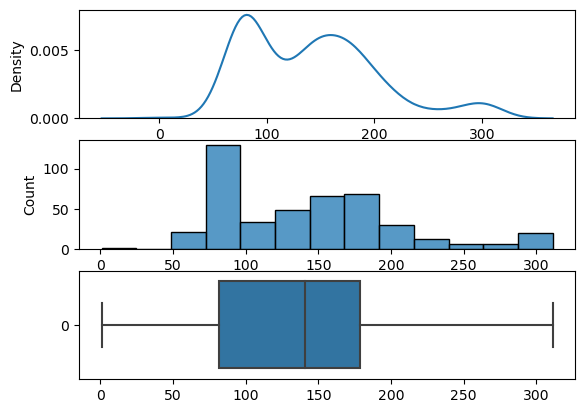

In [237]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(3,1)
sns.kdeplot(final_data.Price,ax=ax[0])
sns.histplot(final_data.Price,ax=ax[1])
sns.boxplot(final_data.Price,ax=ax[2],orient='h')
plt.show()

<Figure size 1000x500 with 0 Axes>

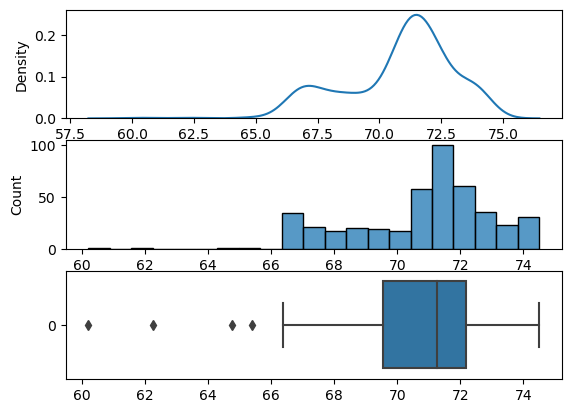

In [238]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(3,1)
sns.kdeplot(final_data.Employement_rate,ax=ax[0])
sns.histplot(final_data.Employement_rate,ax=ax[1])
sns.boxplot(final_data.Employement_rate,ax=ax[2],orient='h')
plt.show()
# Negetively skewed

<Figure size 1000x500 with 0 Axes>

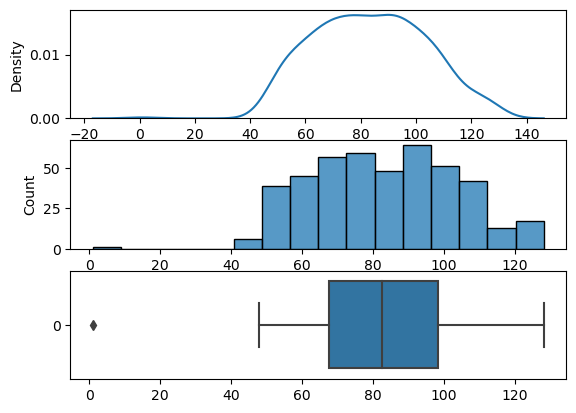

In [239]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(3,1)
sns.kdeplot(final_data.Inflation_rate,ax=ax[0])
sns.histplot(final_data.Inflation_rate,ax=ax[1])
sns.boxplot(final_data.Inflation_rate,ax=ax[2],orient='h')
plt.show()
# towards right negatively skewed

<Figure size 1000x500 with 0 Axes>

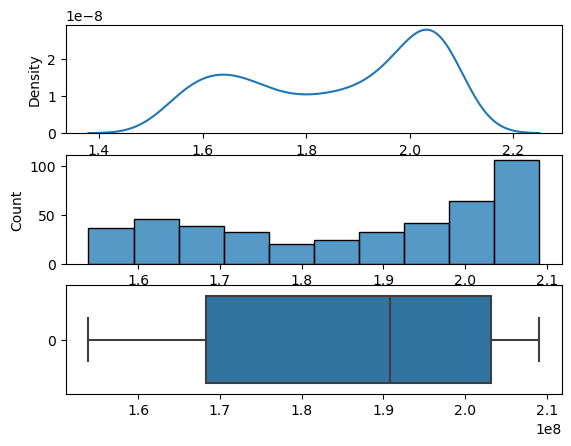

In [240]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(3,1)
sns.kdeplot(final_data.Population,ax=ax[0])
sns.histplot(final_data.Population,ax=ax[1])
sns.boxplot(final_data.Population,ax=ax[2],orient='h')
plt.show()

<Figure size 1000x500 with 0 Axes>

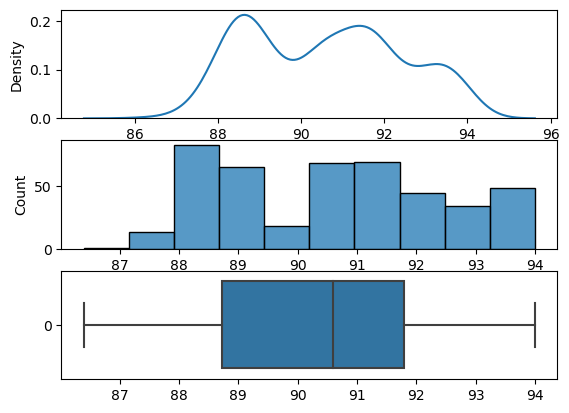

In [241]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(3,1)
sns.kdeplot(final_data.Male_rate,ax=ax[0])
sns.histplot(final_data.Male_rate,ax=ax[1])
sns.boxplot(final_data.Male_rate,ax=ax[2],orient='h')
plt.show()

In [242]:
final_data.columns

Index(['observation_date', 'Price', 'Employement_rate', 'Inflation_rate',
       'Population', 'Male_rate', 'Female_rate', 'GDP', 'emp_popl_ratio',
       'Buildings(K)', 'emp_const_k', 'Income_b', 'House_Ownership%',
       'savings', 'Mortgage'],
      dtype='object')

<Figure size 1000x500 with 0 Axes>

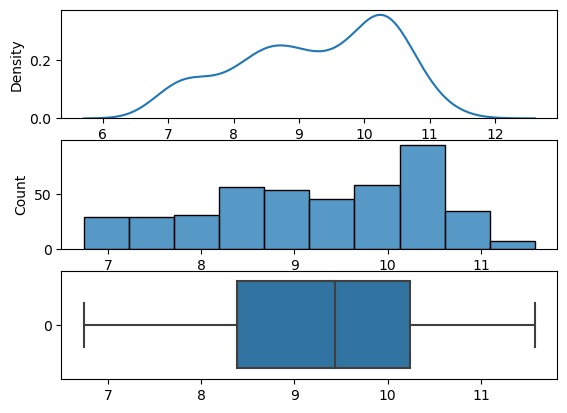

In [243]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(3,1)
sns.kdeplot(final_data.Mortgage,ax=ax[0])
sns.histplot(final_data.Mortgage,ax=ax[1])
sns.boxplot(final_data.Mortgage,ax=ax[2],orient='h')
plt.show()

<Figure size 1000x500 with 0 Axes>

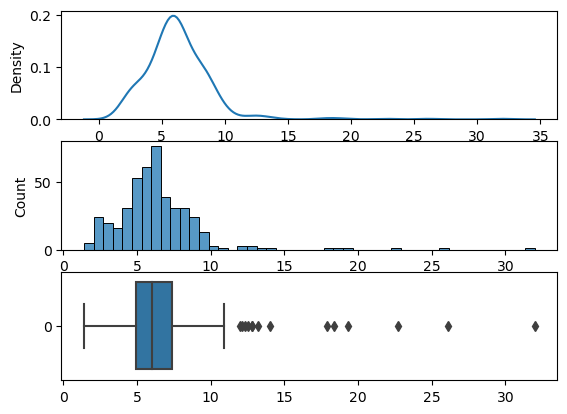

In [244]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(3,1)
sns.kdeplot(final_data.savings,ax=ax[0])
sns.histplot(final_data.savings,ax=ax[1])
sns.boxplot(final_data.savings,ax=ax[2],orient='h')
plt.show()
# positively skewed  and outliers

<Figure size 1000x500 with 0 Axes>

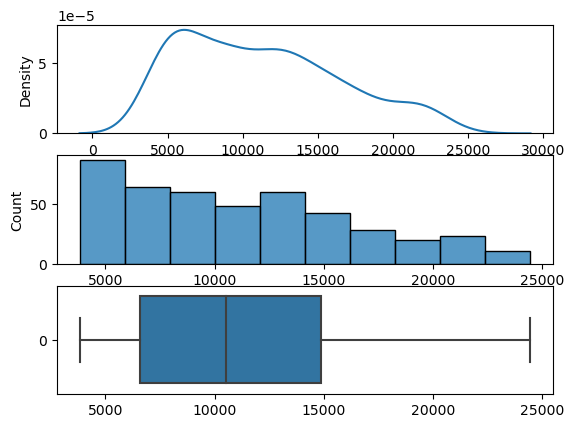

In [245]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(3,1)
sns.kdeplot(final_data.Income_b,ax=ax[0])
sns.histplot(final_data.Income_b,ax=ax[1])
sns.boxplot(final_data.Income_b,ax=ax[2],orient='h')
plt.show()

<Figure size 1000x500 with 0 Axes>

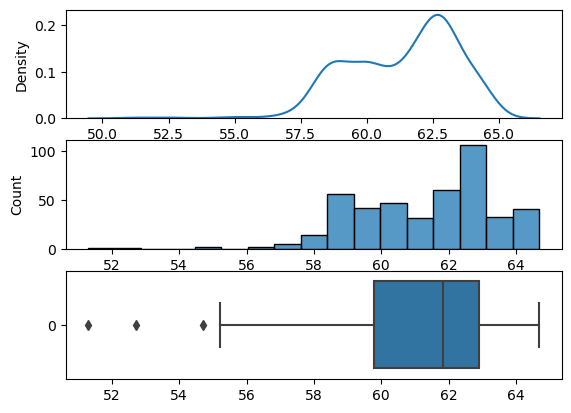

In [246]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(3,1)
sns.kdeplot(final_data.emp_popl_ratio,ax=ax[0])
sns.histplot(final_data.emp_popl_ratio,ax=ax[1])
sns.boxplot(final_data.emp_popl_ratio,ax=ax[2],orient='h')
plt.show()

<Figure size 1000x500 with 0 Axes>

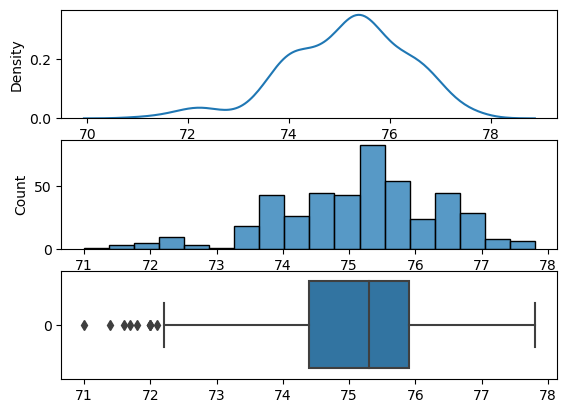

In [247]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(3,1)
sns.kdeplot(final_data.Female_rate,ax=ax[0])
sns.histplot(final_data.Female_rate,ax=ax[1])
sns.boxplot(final_data.Female_rate,ax=ax[2],orient='h')
plt.show()
#negatively skewed

<Figure size 1000x500 with 0 Axes>

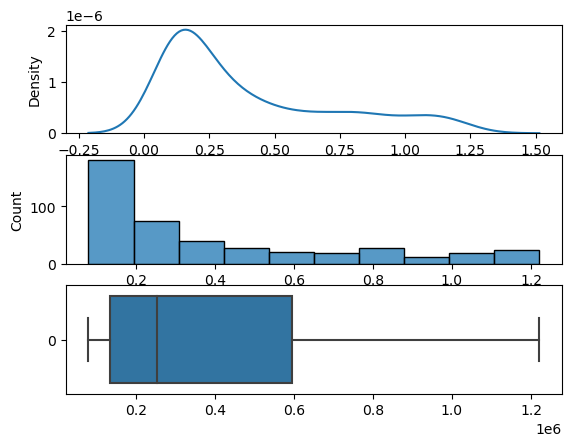

In [248]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(3,1)
sns.kdeplot(final_data.GDP,ax=ax[0])
sns.histplot(final_data.GDP,ax=ax[1])
sns.boxplot(final_data.GDP,ax=ax[2],orient='h')
plt.show()

In [249]:
final_data['Year']=final_data['observation_date'].dt.year
# extract year from the date column

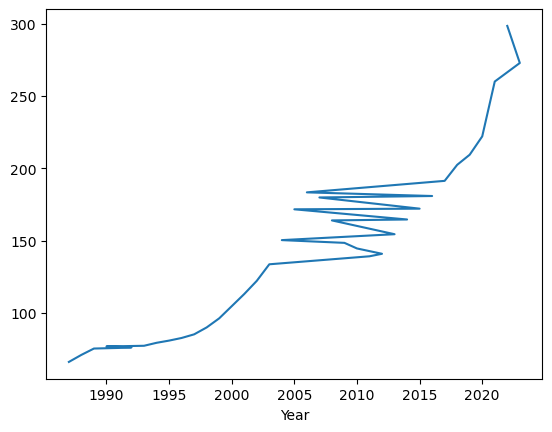

In [250]:
ax=final_data.Price.groupby(final_data.Year).mean().sort_values(ascending=True).plot(kind='line')
for i in ax.containers:
    ax.bar_label(i,fontsize=6)

In [251]:
final_data[['Price','Employement_rate']].corr()

,Price,Employement_rate
Price,1.000000,-0.331433
Employement_rate,-0.331433,1.000000


In [252]:
final_data.columns

Index(['observation_date', 'Price', 'Employement_rate', 'Inflation_rate',
       'Population', 'Male_rate', 'Female_rate', 'GDP', 'emp_popl_ratio',
       'Buildings(K)', 'emp_const_k', 'Income_b', 'House_Ownership%',
       'savings', 'Mortgage', 'Year'],
      dtype='object')

<Axes: >

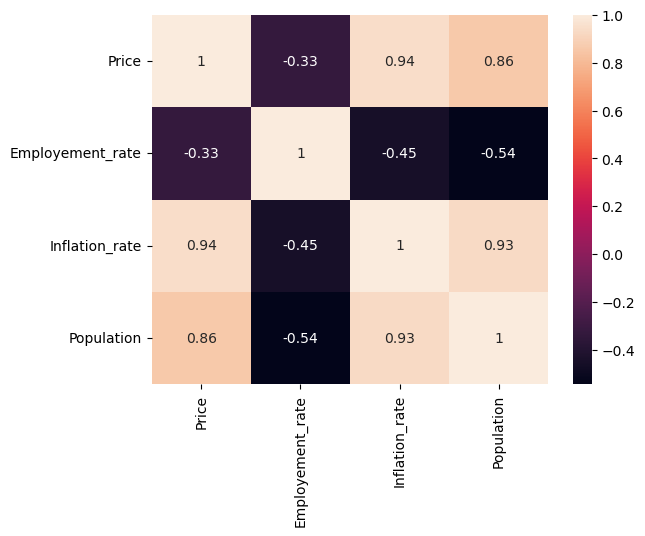

In [253]:
sns.heatmap(final_data[['Price', 'Employement_rate', 'Inflation_rate',
       'Population']].corr(),annot=True)
# Negatively corelted-employement-Price,Inflation-Employment,population-employment rate
# Positively corelated-Price-inflation,Population-employment,inflation-population

<Axes: >

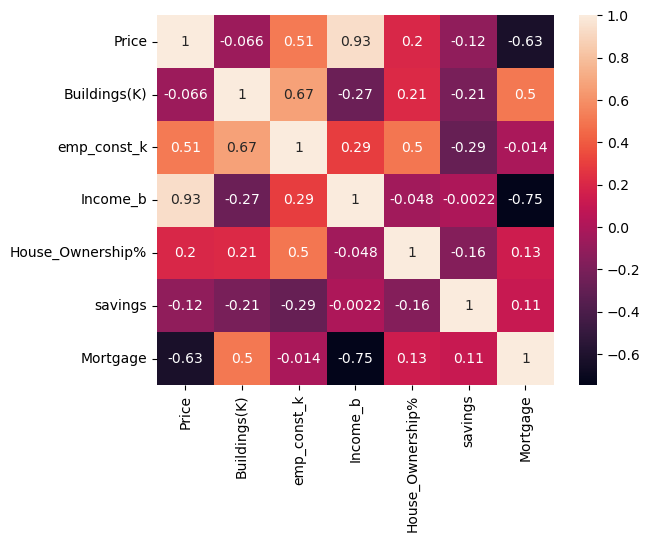

In [254]:
sns.heatmap(final_data[['Price','Buildings(K)', 'emp_const_k', 'Income_b', 'House_Ownership%',
       'savings', 'Mortgage']].corr(),annot=True)
# positively corelated-price-Income,
#Negatively corelted-price-Mortagage
#There is no multicolinarity b/w independent variables but there are outliers so we need to do scaling

<Axes: >

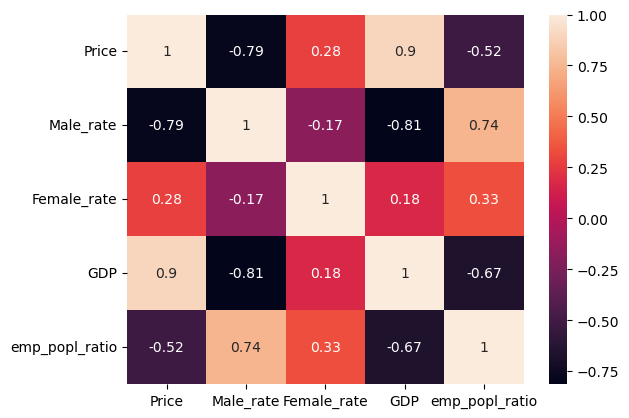

In [255]:
sns.heatmap(final_data[['Price','Male_rate', 'Female_rate', 'GDP', 'emp_popl_ratio']].corr(),annot=True)

In [256]:
data=final_data.drop('Year',axis=1)

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  442 non-null    datetime64[ns]
 1   Price             442 non-null    float64       
 2   Employement_rate  442 non-null    float64       
 3   Inflation_rate    442 non-null    float64       
 4   Population        442 non-null    float64       
 5   Male_rate         442 non-null    float64       
 6   Female_rate       442 non-null    float64       
 7   GDP               442 non-null    float64       
 8   emp_popl_ratio    442 non-null    float64       
 9   Buildings(K)      442 non-null    int64         
 10  emp_const_k       442 non-null    float64       
 11  Income_b          442 non-null    float64       
 12  House_Ownership%  442 non-null    float64       
 13  savings           442 non-null    float64       
 14  Mortgage          442 non-

In [258]:
data.columns

Index(['observation_date', 'Price', 'Employement_rate', 'Inflation_rate',
       'Population', 'Male_rate', 'Female_rate', 'GDP', 'emp_popl_ratio',
       'Buildings(K)', 'emp_const_k', 'Income_b', 'House_Ownership%',
       'savings', 'Mortgage'],
      dtype='object')

In [259]:
#scaling of numcols
from sklearn.preprocessing import StandardScaler

In [260]:
scaler=StandardScaler()

In [261]:
numcols=data.drop(columns=['observation_date'])

In [262]:
numcols_scaled=scaler.fit_transform(numcols)

In [263]:
scaled_df=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [264]:
final_scaled_data=pd.concat([data.observation_date,scaled_df],axis=1)

In [266]:
final_scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  442 non-null    datetime64[ns]
 1   Price             442 non-null    float64       
 2   Employement_rate  442 non-null    float64       
 3   Inflation_rate    442 non-null    float64       
 4   Population        442 non-null    float64       
 5   Male_rate         442 non-null    float64       
 6   Female_rate       442 non-null    float64       
 7   GDP               442 non-null    float64       
 8   emp_popl_ratio    442 non-null    float64       
 9   Buildings(K)      442 non-null    float64       
 10  emp_const_k       442 non-null    float64       
 11  Income_b          442 non-null    float64       
 12  House_Ownership%  442 non-null    float64       
 13  savings           442 non-null    float64       
 14  Mortgage          442 non-

In [267]:
#Model Building
# split data dependent and independent variables
X=final_scaled_data.drop(['observation_date','Price'],axis=1)
y=final_scaled_data.Price

In [268]:
from sklearn.model_selection import train_test_split

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
from sklearn.linear_model import LinearRegression

In [271]:
reg=LinearRegression()
reg_model=reg.fit(X_train,y_train)

In [272]:
reg_model.score(X_train,y_train)

0.9888053233957955

In [273]:
from sklearn.model_selection import cross_val_score

In [274]:
cross_val_score(reg,X_train,y_train)

array([0.98783432, 0.9855377 , 0.98740689, 0.98779035, 0.74776884])

In [275]:
np.mean(cross_val_score(reg,X_train,y_train))

0.9392676188745768

In [276]:
#prediction
reg_pred=reg_model.predict(X_train)

In [277]:
reg_train_resid=y_train-reg_pred

In [278]:
np.sqrt(np.mean(reg_train_resid**2))

0.10179851006341753

In [279]:
# predict on test data
reg_test_pred=reg_model.predict(X_test)

In [282]:
reg_test_resid=y_test-reg_test_pred

In [283]:
np.sqrt(np.mean(reg_test_resid**2))

0.20956986367232236

In [280]:
reg_model.coef_

array([-0.9450483 ,  0.95195674, -0.64290784,  0.31090391, -0.03491867,
        0.10514852,  0.78531402,  0.05349379,  0.25900175,  0.93464778,
       -0.15688493, -0.12384592,  0.14405527])

In [281]:
X_train.columns

Index(['Employement_rate', 'Inflation_rate', 'Population', 'Male_rate',
       'Female_rate', 'GDP', 'emp_popl_ratio', 'Buildings(K)', 'emp_const_k',
       'Income_b', 'House_Ownership%', 'savings', 'Mortgage'],
      dtype='object')